# 손실함수의 이해

In [0]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense

import time

## 두개의 수를 입력으로, 합의 양 음을 출력

```
y = (x1 + x2) > 0
```

In [38]:
x1 = np.arange(-10, 10, 0.1)
np.random.shuffle(x1)
x2 = np.arange(-10, 10, 0.1)
np.random.shuffle(x2)

x = np.ones((x1.shape[0],2))
x[:,0] = x1
x[:,1] = x2

z = x1 + x2

y = z > 0

print(x[:5])
print(z[:5])
print(y[:5])


[[-2.1  3.2]
 [ 3.5 -3.9]
 [ 3.9 -2.7]
 [ 1.  -5.6]
 [-2.3 -9.1]]
[  1.1  -0.4   1.2  -4.6 -11.4]
[ True False  True False False]


In [0]:
s = int(x.shape[0]*0.6)
train_x, test_x = x[:s], x[s:]
train_y, test_y = y[:s], y[s:]

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_84 (Dense)             (None, 10)                30        
_________________________________________________________________
dense_85 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_86 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_87 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_88 (Dense)             (None, 1)                 11        
Total params: 371
Trainable params: 371
Non-trainable params: 0
_________________________________________________________________
elapsed : 32.06455063819885


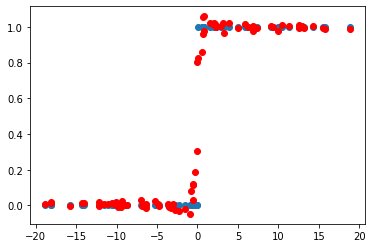

In [42]:

from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense

model1 = keras.Sequential()
model1.add(Dense(10, activation='tanh', input_shape=(2,)))
model1.add(Dense(10, activation='tanh'))
model1.add(Dense(10, activation='tanh'))
model1.add(Dense(10, activation='tanh'))
model1.add(Dense(1))

model1.compile(optimizer="SGD", loss="mse", metrics=["mse"])
model1.summary()

start = time.time()
model1.fit(train_x, train_y, epochs=1000*10, verbose=0, batch_size=128)
print("elapsed :", (time.time() - start))

              
y_ = model.predict(test_x)

plt.scatter(z[s:],test_y)
plt.scatter(z[s:],y_, color="r")
plt.show()


## 모델 구조 변경

중간의 노드가 1개인 은닉층을 추가

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_89 (Dense)             (None, 10)                30        
_________________________________________________________________
dense_90 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_91 (Dense)             (None, 1)                 11        
_________________________________________________________________
dense_92 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_93 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_94 (Dense)             (None, 1)                 11        
Total params: 292
Trainable params: 292
Non-trainable params: 0
_______________________________________________________

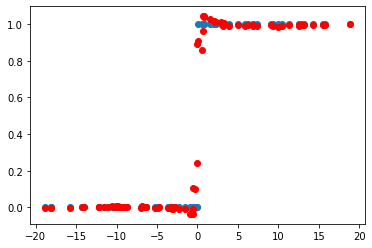

In [44]:
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense

model2 = keras.Sequential()
model2.add(Dense(10, activation='tanh', input_shape=(2,)))
model2.add(Dense(10, activation='tanh'))
model2.add(Dense(1))                     # ADD
model2.add(Dense(10, activation='tanh'))
model2.add(Dense(10, activation='tanh'))
model2.add(Dense(1))

model2.compile(optimizer="SGD", loss="mse", metrics=["mse"])
model2.summary()

start = time.time()
model2.fit(train_x, train_y, epochs=1000*10, verbose=0, batch_size=128)
print("elapsed :", (time.time() - start))

              
y_ = model2.predict(test_x)

plt.scatter(z[s:],test_y)
plt.scatter(z[s:],y_, color="r")
plt.show()


## y = ( x > 0 ) 함수


In [0]:
s = int(x.shape[0]*0.6)
train_x, test_x = z[:s], z[s:] # z = x1 + x2
train_y, test_y = y[:s], y[s:]

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_101 (Dense)            (None, 10)                20        
_________________________________________________________________
dense_102 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_103 (Dense)            (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 31.16512703895569


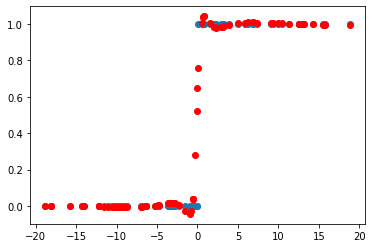

In [49]:
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense

model3 = keras.Sequential()
model3.add(Dense(10, activation='tanh', input_shape=(1,)))
model3.add(Dense(10, activation='tanh'))
model3.add(Dense(1))

model3.compile(optimizer="SGD", loss="mse", metrics=["mse"])
model3.summary()

start = time.time()
model.fit(train_x, train_y, epochs=1000*10, verbose=0, batch_size=128)
print("elapsed :", (time.time() - start))

              
y_ = model3.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_, color="r")
plt.show()


## 학습된 모델과 결합한 새로운 모델



앞에서 학습한 y = (x>0) 모델을 last_half_model로 하고,
그 앞에 다른 새 모델을 추가하여 전체 모델을 구성


model = first_half_model + last_half_model

In [0]:
last_half_model = model3

In [0]:
s = int(x.shape[0]*0.6)
train_x, test_x = x[:s], x[s:]
train_y, test_y = y[:s], y[s:]

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_28 (Sequential)   (None, 1)                 151       
_________________________________________________________________
sequential_25 (Sequential)   (None, 1)                 141       
Total params: 292
Trainable params: 151
Non-trainable params: 141
_________________________________________________________________
elapsed : 33.024815797805786


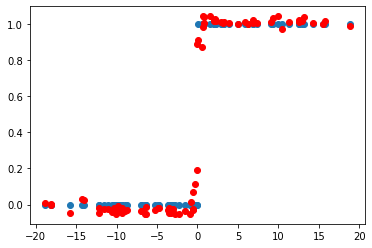

In [54]:
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense

first_half_model = keras.Sequential()
first_half_model.add(Dense(10, activation='tanh', input_shape=(2,)))
first_half_model.add(Dense(10, activation='tanh'))
first_half_model.add(Dense(1))

last_half_model.trainable = False

model4 = keras.Sequential()
model4.add(first_half_model)
model4.add(last_half_model)


model4.compile(optimizer="SGD", loss="mse", metrics=["mse"])
model4.summary()

start = time.time()
model4.fit(train_x, train_y, epochs=1000*10, verbose=0, batch_size=128)
print("elapsed :", (time.time() - start))

              
y_ = model4.predict(test_x)

plt.scatter(z[s:],test_y)
plt.scatter(z[s:],y_, color="r")
plt.show()


## first_half_model 결과 확인


In [57]:
print(np.asarray([1,3]))

[1 3]


In [63]:
i = np.asarray([[-1,0]])
print(i, first_half_model.predict(i))

i = np.asarray([[-1,2]])
print(i, first_half_model.predict(i))

i = np.asarray([[-2,0]])
print(i, first_half_model.predict(i))

i = np.asarray([[-1,1.5]])
print(i, first_half_model.predict(i))

i = np.asarray([[-1,0.5]])
print(i, first_half_model.predict(i))

i = np.asarray([[-1.5,0]])
print(i, first_half_model.predict(i))

i = np.asarray([[-1.5,0.5]])
print(i, first_half_model.predict(i))

i = np.asarray([[-1.5,2.0]])
print(i, first_half_model.predict(i))

[[-1  0]] [[-0.75997394]]
[[-1  2]] [[1.081697]]
[[-2  0]] [[-0.9913835]]
[[-1.   1.5]] [[0.7069792]]
[[-1.   0.5]] [[-0.3517931]]
[[-1.5  0. ]] [[-0.91625816]]
[[-1.5  0.5]] [[-0.72799045]]
[[-1.5  2. ]] [[0.6531817]]


first_half_model은 합한 결과의 음양을 보전하는 값을 출력한다.


## 고찰


- model1 : 두수를 합하여 음양을 구분하는 함수

- model2 : model1과 동일한데 중간에 노드가 1개인 은닉층 추가

- model3 : 음양 구분 함수

- model4 : model3을 뒤에 두고 새로운 앞 부분만 학습한

<br>

model4와 model2는 구조적으로 완벽하게 동일하다.

그런데 model4의 뒷부분은 응양만 구분한다. 그렇다면 model4의 앞부분 first_half_model은 입력 두수를 합하고 음양만 보전하는 함수이다.

<br>

기존에는 원하는 출력과 실제 출력 간의 차이를 rms나 cross entropy를 cost function 사용하여 그 차이가 최소로 되도록 모델을 학습하게 하였다.

이렇게 cost function을 사용하여 학습이 학습되는 방향을 설정해 준다. 이를 수식으로 표현한다. 혹은 다른 모델을 사용하여 학습의 방향을 설정해 준다.


